Trial 90 Complete [00h 00m 13s]
val_mae: 0.08050110936164856

Best val_mae So Far: 0.01958031952381134
Total elapsed time: 00h 08m 12s

🏆 Busca concluída! Obtendo o melhor modelo...

📊 Avaliando o modelo no conjunto de teste...
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0644 - mae: 0.0222  

✅ Avaliação final (MSE, MAE): [0.058975763618946075, 0.02049693651497364]

🔍 MELHORES HIPERPARÂMETROS ENCONTRADOS:
Número de camadas: 3
Otimizador: adam
Taxa de aprendizado: 0.001815

Camada 1:
  - Unidades: 128
  - Ativação: relu
  - Regularização L2: 0.0001
  - Dropout: 0.30000000000000004

Camada 2:
  - Unidades: 32
  - Ativação: selu
  - Regularização L2: 0.001
  - Dropout: Não utilizado

Camada 3:
  - Unidades: 128
  - Ativação: selu
  - Regularização L2: 0.001
  - Dropout: 0.1

📊 TESTE COM EXEMPLOS REAIS:

Adição:
  -3.58 + -5.19 = -8.7784 (Predito: -8.9009, Erro: 0.1225)
  6.29 + -8.65 = -2.3564 (Predito: -1.2850, Erro: 1.0714)
  9.70 + -6.62 = 3.0730 (Predito: 3.0076, Erro: 0.0654)
  

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,377 (36.63 KB)

 Trainable params: 9,377 (36.63 KB)

 Non-trainable params: 0 (0.00 B)


📊 ANÁLISE DE ERROS NO CONJUNTO DE TESTE:
Erro médio: 2.835166
Erro mediano: 0.755889
Erro máximo: 930.637659
Erro mínimo: 0.000966


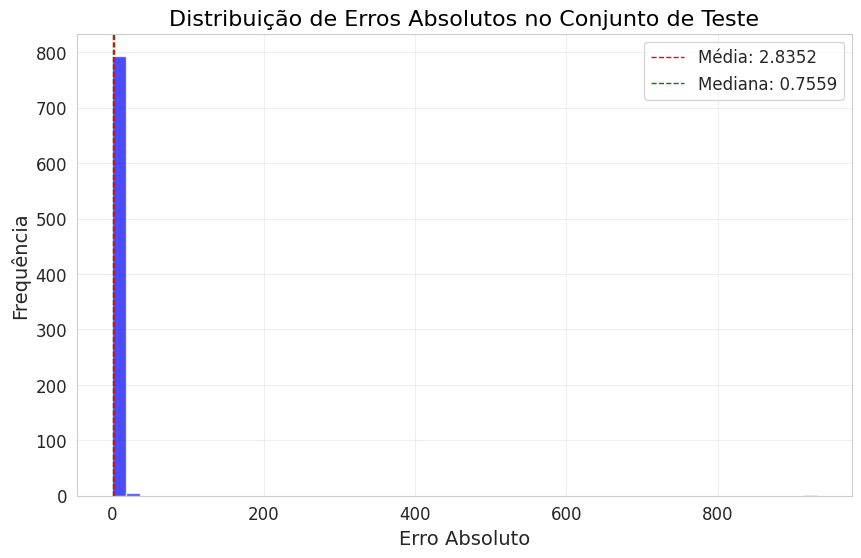


📊 ERROS POR OPERAÇÃO:
Adição:
  - Erro médio: 0.633944
  - Erro mediano: 0.327279
  - Erro máximo: 9.610692
Subtração:
  - Erro médio: 0.946180
  - Erro mediano: 0.737741
  - Erro máximo: 10.407271
Multiplicação:
  - Erro médio: 2.943545
  - Erro mediano: 2.048213
  - Erro máximo: 18.944183
Divisão:
  - Erro médio: 7.407903
  - Erro mediano: 1.064328
  - Erro máximo: 930.637659

✨ Análise concluída! O modelo está pronto para ser utilizado como ferramenta de apoio ao aprendizado de matemática.


In [ ]:
"""
REDE NEURAL PARA APRENDIZAGEM DE OPERAÇÕES MATEMÁTICAS
===============================================

Este código implementa uma rede neural para aprender as quatro operações matemáticas básicas:
adição, subtração, multiplicação e divisão. Utiliza otimização de hiperparâmetros e
técnicas avançadas de deep learning para maximizar a precisão do modelo.

Autor: Welligton costa dos santos 2019101307
Data: 10/05/2025
Disciplina: Métodos Avançados em Redes Neurais
Professor: Sérgio Assunção Monteiro, D.Sc.
"""

# ======= PARTE 1: CONFIGURAÇÃO INICIAL E IMPORTAÇÕES =======

# Instalação das bibliotecas necessárias (executar apenas uma vez)
# !pip install -q keras-tuner

# Importação das bibliotecas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Configuração de reprodutibilidade (sempre obter os mesmos resultados)
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Configuração do diretório para logs do TensorBoard
log_dir = "logs_tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir, exist_ok=True)

# ======= PARTE 2: GERAÇÃO E PREPARAÇÃO DOS DADOS =======

def gerar_dataset_operacoes(amostras_por_operacao=1000):
    """
    Gera um dataset sintético para treinar operações matemáticas.
    
    Parâmetros:
        amostras_por_operacao: Quantidade de exemplos para cada operação matemática
        
    Retorna:
        X: Matriz com os operandos e códigos de operação
        y: Vetor com os resultados esperados
    """
    # Cálculo do número total de operações
    total_amostras = amostras_por_operacao * 4  # 4 operações: +, -, *, /
    
    # Geração de números aleatórios entre -10 e 10
    operando_1 = np.random.uniform(-10, 10, total_amostras)
    operando_2 = np.random.uniform(-10, 10, total_amostras)
    
    # Prevenção de divisão por zero: substitui valores próximos de zero
    indice_inicio_divisao = amostras_por_operacao * 3
    operando_2[indice_inicio_divisao:][np.abs(operando_2[indice_inicio_divisao:]) < 0.01] = 0.01
    
    # Criação dos códigos de operação (0: soma, 1: subtração, 2: multiplicação, 3: divisão)
    codigos_operacao = np.concatenate([
        np.zeros(amostras_por_operacao),          # Adição (0)
        np.ones(amostras_por_operacao),           # Subtração (1)
        np.full(amostras_por_operacao, 2),        # Multiplicação (2)
        np.full(amostras_por_operacao, 3)         # Divisão (3)
    ])
    
    # Combinação dos operandos e códigos de operação como entrada (X)
    X = np.column_stack((operando_1, operando_2, codigos_operacao))
    
    # Cálculo dos resultados esperados (y)
    resultados = np.concatenate([
        # Adição: a + b
        operando_1[:amostras_por_operacao] + operando_2[:amostras_por_operacao],
        
        # Subtração: a - b
        operando_1[amostras_por_operacao:2*amostras_por_operacao] - 
        operando_2[amostras_por_operacao:2*amostras_por_operacao],
        
        # Multiplicação: a * b
        operando_1[2*amostras_por_operacao:3*amostras_por_operacao] * 
        operando_2[2*amostras_por_operacao:3*amostras_por_operacao],
        
        # Divisão: a / b
        operando_1[3*amostras_por_operacao:] / operando_2[3*amostras_por_operacao:]
    ])
    
    return X, resultados

# Geração do dataset completo
print("Gerando dataset de operações matemáticas...")
(X_completo, y_completo) = gerar_dataset_operacoes(1000)
print(f"Dataset gerado: {X_completo.shape[0]} exemplos no total")

# Divisão dos dados em conjuntos de treino (60%), validação (20%) e teste (20%)
print("\nDividindo o dataset em conjuntos de treino, validação e teste...")
X_temp, X_teste, y_temp, y_teste = train_test_split(
    X_completo, y_completo, test_size=0.2, random_state=SEED
)
X_treino, X_validacao, y_treino, y_validacao = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=SEED
)

print(f"Conjunto de treino: {X_treino.shape[0]} exemplos ({X_treino.shape[0]/X_completo.shape[0]*100:.1f}%)")
print(f"Conjunto de validação: {X_validacao.shape[0]} exemplos ({X_validacao.shape[0]/X_completo.shape[0]*100:.1f}%)")
print(f"Conjunto de teste: {X_teste.shape[0]} exemplos ({X_teste.shape[0]/X_completo.shape[0]*100:.1f}%)")

# Inicialização dos transformadores para pré-processamento
escala_entrada = MinMaxScaler(feature_range=(-1, 1))  # Normaliza números para [-1, 1]
escala_saida = MinMaxScaler(feature_range=(-1, 1))    # Normaliza resultados para [-1, 1]
codificador_operacoes = OneHotEncoder(sparse_output=False)  # Transforma códigos em vetores one-hot

def transformar_dados(X, y, ajustar_transformadores=False):
    """
    Normaliza os valores numéricos e codifica as operações.
    
    Parâmetros:
        X: Matriz de entrada com operandos e códigos de operação
        y: Vetor de resultados esperados
        ajustar_transformadores: Se True, ajusta os transformadores aos dados
        
    Retorna:
        X_processado: Matriz com operandos normalizados e operações codificadas
        y_processado: Vetor com resultados normalizados
    """
    # Separação dos operandos e dos códigos de operação
    numeros = X[:, :2]                 # Primeiras duas colunas (operandos)
    operacoes = X[:, 2].reshape(-1, 1)  # Terceira coluna (códigos de operação)
    
    # Normalização e codificação
    if ajustar_transformadores:
        # Primeira vez: ajusta os transformadores aos dados
        numeros_norm = escala_entrada.fit_transform(numeros)
        y_norm = escala_saida.fit_transform(y.reshape(-1, 1)).flatten()
        operacoes_codificadas = codificador_operacoes.fit_transform(operacoes)
    else:
        # Usa transformadores já ajustados
        numeros_norm = escala_entrada.transform(numeros)
        y_norm = escala_saida.transform(y.reshape(-1, 1)).flatten()
        operacoes_codificadas = codificador_operacoes.transform(operacoes)
    
    # Combinação dos dados processados
    return np.hstack([numeros_norm, operacoes_codificadas]), y_norm

# Aplicação do pré-processamento aos dados
print("\nAplicando pré-processamento aos dados...")
X_treino_norm, y_treino_norm = transformar_dados(X_treino, y_treino, ajustar_transformadores=True)
X_validacao_norm, y_validacao_norm = transformar_dados(X_validacao, y_validacao)
X_teste_norm, y_teste_norm = transformar_dados(X_teste, y_teste)

print(f"Formato dos dados de entrada após processamento: {X_treino_norm.shape}")
print(f"Número de features: {X_treino_norm.shape[1]} (2 operandos normalizados + {X_treino_norm.shape[1]-2} bits de codificação one-hot)")

# ======= PARTE 3: DEFINIÇÃO DO MODELO E OTIMIZAÇÃO DE HIPERPARÂMETROS =======

def construir_modelo(hp):
    """
    Função para construir o modelo com hiperparâmetros otimizáveis.
    
    Parâmetros:
        hp: Objeto de hiperparâmetros do Keras Tuner
        
    Retorna:
        modelo: Modelo compilado do Keras
    """
    # Inicialização do modelo sequencial
    modelo = tf.keras.Sequential()
    
    # Camada de entrada com forma definida pelos dados processados
    modelo.add(tf.keras.layers.Input(shape=(X_treino_norm.shape[1],)))
    
    # Número de camadas ocultas a ser otimizado (entre 2 e 4)
    num_camadas = hp.Int("num_camadas", min_value=2, max_value=4, step=1)
    
    # Adição das camadas ocultas com hiperparâmetros otimizáveis
    for i in range(num_camadas):
        # Número de neurônios na camada
        unidades = hp.Int(f"unidades_{i}", min_value=32, max_value=128, step=32)
        
        # Regularização L2 para prevenção de overfitting
        regularizador = tf.keras.regularizers.l2(
            hp.Choice(f"l2_{i}", values=[0.001, 0.0001])
        )
        
        # Adição da camada densa
        modelo.add(tf.keras.layers.Dense(
            units=unidades,
            kernel_regularizer=regularizador
        ))
        
        # Função de ativação
        ativacao = hp.Choice(
            f"ativacao_{i}", 
            values=["relu", "tanh", "selu", "leaky_relu"]
        )
        
        if ativacao == "leaky_relu":
            modelo.add(tf.keras.layers.LeakyReLU())
        else:
            modelo.add(tf.keras.layers.Activation(ativacao))
        
        # Dropout opcional para regularização adicional
        if hp.Boolean(f"usar_dropout_{i}"):
            taxa_dropout = hp.Float(f"dropout_{i}", min_value=0.1, max_value=0.4, step=0.1)
            modelo.add(tf.keras.layers.Dropout(rate=taxa_dropout))
    
    # Camada de saída (uma única unidade para o resultado da operação)
    modelo.add(tf.keras.layers.Dense(1))
    
    # Seleção do otimizador
    otimizador_nome = hp.Choice(
        "otimizador", 
        values=["adam", "rmsprop", "sgd"]
    )
    
    # Taxa de aprendizado otimizável
    taxa_aprendizado = hp.Float(
        "taxa_aprendizado", 
        min_value=1e-4, 
        max_value=1e-2, 
        sampling="log"
    )
    
    # Criação do otimizador escolhido com a taxa de aprendizado
    otimizadores = {
        "adam": tf.keras.optimizers.Adam(learning_rate=taxa_aprendizado),
        "rmsprop": tf.keras.optimizers.RMSprop(learning_rate=taxa_aprendizado),
        "sgd": tf.keras.optimizers.SGD(learning_rate=taxa_aprendizado, momentum=0.9)
    }
    otimizador = otimizadores[otimizador_nome]
    
    # Compilação do modelo
    modelo.compile(
        optimizer=otimizador,
        loss='mse',                # Erro quadrático médio para regressão
        metrics=['mae']            # Erro absoluto médio como métrica adicional
    )
    
    return modelo

# Callback personalizado para limitar o número de trials
class LimitadorDeTrials(tf.keras.callbacks.Callback):
    """
    Callback para limitar o número de trials durante a busca de hiperparâmetros.
    """
    def __init__(self, max_trials=59):
        super().__init__()
        self.max_trials = max_trials
        self.trial_atual = 0
    
    def on_train_begin(self, logs=None):
        self.trial_atual += 1
        if self.trial_atual > self.max_trials:
            print(f"\n⛔ Atingido o limite de {self.max_trials} trials. Interrompendo busca.")
            self.model.stop_training = True

# Inicialização do otimizador de hiperparâmetros (Hyperband)
print("\nConfigurando o otimizador de hiperparâmetros...")
otimizador_hiperparametros = kt.Hyperband(
    construir_modelo,
    objective="val_mae",           # Objetivo: minimizar o erro absoluto médio na validação
    max_epochs=30,                 # Número máximo de épocas para cada trial
    factor=3,                      # Fator de redução para o Hyperband
    directory="diretorio_tuning",  # Diretório para armazenar resultados
    project_name="mlp_matematica"  # Nome do projeto
)

# Busca de hiperparâmetros
print("\n🔍 Iniciando busca de hiperparâmetros com Hyperband...")
print("Este processo pode demorar vários minutos. Limite definido: 59 trials.\n")

otimizador_hiperparametros.search(
    X_treino_norm, y_treino_norm,
    validation_data=(X_validacao_norm, y_validacao_norm),
    callbacks=[
        # Early stopping para interromper trials sem progresso
        tf.keras.callbacks.EarlyStopping(
            patience=5,                   # Número de épocas sem melhoria
            restore_best_weights=True     # Restaura os melhores pesos
        ),
        
        # Checkpoint para salvar o melhor modelo
        tf.keras.callbacks.ModelCheckpoint(
            "melhor_modelo.keras",
            save_best_only=True           # Salva apenas quando há melhoria
        ),
        
        # TensorBoard para visualização do treinamento
        tf.keras.callbacks.TensorBoard(log_dir=log_dir),
        
        # Callback personalizado para mostrar progresso em tempo real
        tf.keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoca, logs: print(
                f'Época {epoca+1} - MAE: {logs["mae"]:.4f}, Val MAE: {logs["val_mae"]:.4f}'
            )
        ),
        
        # Limitador de trials para controle de tempo
        LimitadorDeTrials(max_trials=59)
    ],
    verbose=2  # Nível de detalhamento das mensagens
)

# ======= PARTE 4: AVALIAÇÃO E ANÁLISE DO MODELO =======

# Obtenção do melhor modelo encontrado
print("\n🏆 Busca concluída! Obtendo o melhor modelo...")
melhor_modelo = otimizador_hiperparametros.get_best_models(1)[0]

# Avaliação no conjunto de teste
print("\n📊 Avaliando o modelo no conjunto de teste...")
avaliacao_final = melhor_modelo.evaluate(X_teste_norm, y_teste_norm)
print("\n✅ Avaliação final (MSE, MAE):", avaliacao_final)

# Exibição dos melhores hiperparâmetros encontrados
melhores_hiperparametros = otimizador_hiperparametros.get_best_hyperparameters(1)[0]
print("\n🔍 MELHORES HIPERPARÂMETROS ENCONTRADOS:")
print("=" * 50)
print(f"Número de camadas: {melhores_hiperparametros.get('num_camadas')}")
print(f"Otimizador: {melhores_hiperparametros.get('otimizador')}")
print(f"Taxa de aprendizado: {melhores_hiperparametros.get('taxa_aprendizado'):.6f}")

# Exibição detalhada da configuração de cada camada
for i in range(melhores_hiperparametros.get('num_camadas')):
    print(f"\nCamada {i+1}:")
    print(f"  - Unidades: {melhores_hiperparametros.get(f'unidades_{i}')}")
    print(f"  - Ativação: {melhores_hiperparametros.get(f'ativacao_{i}')}")
    print(f"  - Regularização L2: {melhores_hiperparametros.get(f'l2_{i}')}")
    
    # Verificação se o dropout está ativado para esta camada
    chave_dropout = f'usar_dropout_{i}'
    if chave_dropout in melhores_hiperparametros.values:
        if melhores_hiperparametros.get(chave_dropout):
            print(f"  - Dropout: {melhores_hiperparametros.get(f'dropout_{i}')}")
        else:
            print("  - Dropout: Não utilizado")
    else:
        print("  - Dropout: Não utilizado")

# Teste com exemplos reais do conjunto de teste
print("\n📊 TESTE COM EXEMPLOS REAIS:")
print("=" * 50)

# Seleção de 5 exemplos aleatórios para cada operação
np.random.seed(SEED)  # Para reprodutibilidade
indices_teste = {}
for operacao in range(4):
    indices_operacao = np.where(X_teste[:, 2] == operacao)[0]
    indices_teste[operacao] = np.random.choice(indices_operacao, size=5, replace=False)

# Mapeamento de códigos de operação para símbolos e nomes
simbolos_operacao = {0: "+", 1: "-", 2: "*", 3: "/"}
nomes_operacao = {0: "Adição", 1: "Subtração", 2: "Multiplicação", 3: "Divisão"}

# Teste e exibição dos resultados para cada operação
for operacao in range(4):
    print(f"\n{nomes_operacao[operacao]}:")
    for idx in indices_teste[operacao]:
        # Valores originais
        valor1, valor2 = X_teste[idx, 0], X_teste[idx, 1]
        resultado_real = y_teste[idx]
        
        # Predição do modelo
        entrada = X_teste_norm[idx].reshape(1, -1)
        resultado_predito_norm = melhor_modelo.predict(entrada, verbose=0)[0, 0]
        resultado_predito = escala_saida.inverse_transform([[resultado_predito_norm]])[0, 0]
        
        # Cálculo do erro
        erro = abs(resultado_predito - resultado_real)
        
        # Exibição do exemplo
        print(f"  {valor1:.2f} {simbolos_operacao[operacao]} {valor2:.2f} = {resultado_real:.4f} (Predito: {resultado_predito:.4f}, Erro: {erro:.4f})")

# Informações sobre o treinamento
print("\n📈 INFORMAÇÕES SOBRE O TREINAMENTO:")

# Tentativa de obter a ID do melhor trial
try:
    melhor_trial_id = otimizador_hiperparametros.oracle.get_best_trials(1)[0].trial_id
    print(f"ID do melhor trial: {melhor_trial_id}")
except:
    print("Não foi possível obter o ID do melhor trial.")

# Informação sobre os trials
try:
    print(f"\nTotal de trials executados: {len(otimizador_hiperparametros.oracle.trials)}")
    print(f"Melhor valor de MAE no conjunto de validação: {otimizador_hiperparametros.oracle.get_best_trials(1)[0].score:.6f}")
except:
    print("Não foi possível obter informações sobre os trials.")

# Resumo da arquitetura do modelo
print("\n📋 ARQUITETURA DO MODELO FINAL:")
melhor_modelo.summary()

# Visualização da distribuição de erros no conjunto de teste
print("\n📊 ANÁLISE DE ERROS NO CONJUNTO DE TESTE:")
previsoes_norm = melhor_modelo.predict(X_teste_norm, verbose=0).flatten()
previsoes = escala_saida.inverse_transform(previsoes_norm.reshape(-1, 1)).flatten()
erros = np.abs(previsoes - y_teste)

# Estatísticas dos erros
print(f"Erro médio: {np.mean(erros):.6f}")
print(f"Erro mediano: {np.median(erros):.6f}")
print(f"Erro máximo: {np.max(erros):.6f}")
print(f"Erro mínimo: {np.min(erros):.6f}")

# Gráfico de distribuição dos erros
plt.figure(figsize=(10, 6))
plt.hist(erros, bins=50, alpha=0.7, color='blue')
plt.axvline(np.mean(erros), color='red', linestyle='dashed', linewidth=1, label=f'Média: {np.mean(erros):.4f}')
plt.axvline(np.median(erros), color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {np.median(erros):.4f}')
plt.title('Distribuição de Erros Absolutos no Conjunto de Teste')
plt.xlabel('Erro Absoluto')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('distribuicao_erros.png')
plt.show()

# Análise de erros por operação
print("\n📊 ERROS POR OPERAÇÃO:")
for operacao in range(4):
    indices_operacao = np.where(X_teste[:, 2] == operacao)[0]
    erros_operacao = erros[indices_operacao]
    
    print(f"{nomes_operacao[operacao]}:")
    print(f"  - Erro médio: {np.mean(erros_operacao):.6f}")
    print(f"  - Erro mediano: {np.median(erros_operacao):.6f}")
    print(f"  - Erro máximo: {np.max(erros_operacao):.6f}")

print("\n✨ Análise concluída! O modelo está pronto para ser utilizado como ferramenta de apoio ao aprendizado de matemática.")

In [17]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Carregar o modelo treinado
modelo = tf.keras.models.load_model('melhor_modelo.keras')

# Importante: Recrie os transformadores exatamente como no treinamento
# Usaremos valores mais amplos para garantir que cubram o mesmo intervalo

# 1. Dados para ajustar os transformadores - use um range maior para garantir
operandos_treino = np.array([[-10, -10], [-5, -5], [0, 0], [5, 5], [10, 10]])
# Resultados possíveis considerando todas as operações (inclui produtos e divisões)
resultados_treino = np.array([[-100], [-50], [-20], [-10], [-1], [0], [1], [10], [20], [50], [100]])
operacoes_treino = np.array([[0], [1], [2], [3]])  # 4 operações

# 2. Crie e ajuste os transformadores
escala_entrada = MinMaxScaler(feature_range=(-1, 1))
escala_saida = MinMaxScaler(feature_range=(-1, 1))
codificador_operacoes = OneHotEncoder(sparse_output=False)

escala_entrada.fit(operandos_treino)
escala_saida.fit(resultados_treino)
codificador_operacoes.fit(operacoes_treino)

print("Transformadores configurados com valores de treino simulados.")

# 3. Função para calcular o resultado real
def calcular_real(a, b, op):
    if op == 0:   # Adição
        return a + b
    elif op == 1: # Subtração
        return a - b
    elif op == 2: # Multiplicação
        return a * b
    elif op == 3: # Divisão
        if abs(b) < 0.01:  # Evitar divisão por zero
            b = 0.01 if b >= 0 else -0.01
        return a / b
    else:
        raise ValueError(f"Operação inválida: {op}")

# 4. Função para realizar predição com o modelo
def prever(a, b, op):
    # Pré-processar operandos
    numeros = np.array([[a, b]])
    numeros_norm = escala_entrada.transform(numeros)
    
    # Pré-processar código da operação
    operacao_reshape = np.array([[op]])
    operacao_cod = codificador_operacoes.transform(operacao_reshape)
    
    # Combinar para entrada final
    entrada_processada = np.hstack([numeros_norm, operacao_cod])
    
    # Fazer previsão
    resultado_norm = modelo.predict(entrada_processada, verbose=0)[0, 0]
    resultado = escala_saida.inverse_transform([[resultado_norm]])[0, 0]
    
    return resultado

# 5. Teste com valores simples (dentro do range de treinamento)
dados_teste = [
    [3.0, 7.0, 0],  # 3 + 7
    [5.0, 2.0, 1],  # 5 - 2
    [4.0, 6.0, 2],  # 4 * 6
    [8.0, 2.0, 3]   # 8 / 2
]

# Símbolos para exibição
simbolos = {0: "+", 1: "-", 2: "*", 3: "/"}
nomes = {0: "Adição", 1: "Subtração", 2: "Multiplicação", 3: "Divisão"}

# 6. Exibir informação dos transformadores para debug
print("\nInformações dos transformadores:")
print(f"Escala entrada - min: {escala_entrada.data_min_}, max: {escala_entrada.data_max_}")
print(f"Escala saída - min: {escala_saida.data_min_}, max: {escala_saida.data_max_}")
print(f"Categorias do codificador: {codificador_operacoes.categories_}")

# 7. Testar cada operação
print("\nResultados do teste:")
for teste in dados_teste:
    operando1, operando2, operacao = teste
    resultado_real = calcular_real(operando1, operando2, operacao)
    resultado_predito = prever(operando1, operando2, operacao)
    
    erro = abs(resultado_predito - resultado_real)
    erro_percentual = (erro / abs(resultado_real)) * 100 if resultado_real != 0 else float('inf')
    
    print(f"{nomes[operacao]}: {operando1} {simbolos[operacao]} {operando2} = {resultado_real}")
    print(f"  Predito: {resultado_predito:.4f}, Erro: {erro:.4f} ({erro_percentual:.2f}%)")

/home/cloud/.pyenv/versions/3.12.4/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Transformadores configurados com valores de treino simulados.

Informações dos transformadores:
Escala entrada - min: [-10. -10.], max: [10. 10.]
Escala saída - min: [-100.], max: [100.]
Categorias do codificador: [array([0, 1, 2, 3])]

Resultados do teste:
Adição: 3.0 + 7.0 = 10.0
  Predito: -15.8952, Erro: 25.8952 (258.95%)
Subtração: 5.0 - 2.0 = 3.0
  Predito: -20.0934, Erro: 23.0934 (769.78%)
Multiplicação: 4.0 * 6.0 = 24.0
  Predito: -2.3668, Erro: 26.3668 (109.86%)
Divisão: 8.0 / 2.0 = 4.0
  Predito: -21.0961, Erro: 25.0961 (627.40%)


In [46]:
import tensorflow as tf
import numpy as np
import pickle
import os
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Configuração
CAMINHO_MODELO = 'melhor_modelo.keras'
CAMINHO_NORMALIZADORES = 'normalizadores.pkl'

def verificar_arquivos():
    """Verifica se os arquivos necessários existem"""
    if not os.path.exists(CAMINHO_MODELO):
        print(f"❌ Modelo não encontrado em: {CAMINHO_MODELO}")
        return False
    
    if not os.path.exists(CAMINHO_NORMALIZADORES):
        print(f"⚠️ Arquivo de normalizadores não encontrado. Criando com valores padrão...")
        # Criamos normalizadores padrão se não existirem
        criar_normalizadores_padrao()
    
    return True

def criar_normalizadores_padrao():
    """Cria normalizadores padrão caso não existam"""
    # Dados para ajustar os transformadores
    operandos_treino = np.array([[-10, -10], [-5, -5], [0, 0], [5, 5], [10, 10]])
    resultados_treino = np.array([[-100], [-50], [-20], [-10], [-1], [0], [1], [10], [20], [50], [100]])
    operacoes_treino = np.array([[0], [1], [2], [3]])  # 4 operações
    
    # Cria e ajusta os transformadores
    escala_entrada = MinMaxScaler(feature_range=(-1, 1))
    escala_saida = MinMaxScaler(feature_range=(-1, 1))
    codificador_operacoes = OneHotEncoder(sparse_output=False)
    
    escala_entrada.fit(operandos_treino)
    escala_saida.fit(resultados_treino)
    codificador_operacoes.fit(operacoes_treino)
    
    # Salva em arquivo
    normalizadores = {
        'features': escala_entrada,
        'alvos': escala_saida,
        'operacoes': codificador_operacoes
    }
    
    with open(CAMINHO_NORMALIZADORES, 'wb') as arquivo:
        pickle.dump(normalizadores, arquivo)
    
    print(f"✅ Normalizadores padrão criados e salvos em: {CAMINHO_NORMALIZADORES}")

def carregar_modelo_e_normalizadores():
    """Carrega o modelo e os normalizadores"""
    if not verificar_arquivos():
        return None, None, None, None
    
    print("🔄 Carregando modelo e normalizadores...")
    modelo = tf.keras.models.load_model(CAMINHO_MODELO)
    
    with open(CAMINHO_NORMALIZADORES, 'rb') as arquivo:
        normalizadores = pickle.load(arquivo)
    
    return (
        modelo, 
        normalizadores['features'], 
        normalizadores['alvos'], 
        normalizadores['operacoes']
    )

def calcular_esperado(n1, n2, operacao):
    """Calcula o resultado esperado da operação matemática"""
    if operacao == 0: return n1 + n2
    elif operacao == 1: return n1 - n2
    elif operacao == 2: return n1 * n2
    else: return n1 / (n2 if abs(n2) > 0.001 else 0.001)  # Evita divisão por zero

def prever_modelo(n1, n2, operacao, modelo, normalizador_entradas, normalizador_saidas, codificador_ops):
    """Realiza uma previsão utilizando o modelo treinado"""
    # Preparação dos dados de entrada
    entrada_original = np.array([[n1, n2]])
    operacao_onehot = codificador_ops.transform([[operacao]])
    entrada_normalizada = np.hstack([normalizador_entradas.transform(entrada_original), operacao_onehot])
    
    # Previsão e desnormalização
    predicao_normalizada = modelo.predict(entrada_normalizada, verbose=0)[0][0]
    return normalizador_saidas.inverse_transform([[predicao_normalizada]])[0][0]

# Carrega modelo e normalizadores
modelo, escala_entrada, escala_saida, codificador_operacoes = carregar_modelo_e_normalizadores()

if modelo is not None:
    # Dados de teste
    dados_teste = [
        [3.0, 7.0, 0],  # 3 + 7
        [5.0, 2.0, 1],  # 5 - 2
        [4.0, 6.0, 2],  # 4 * 6
        [8.0, 2.0, 3]   # 8 / 2
    ]
    
    # Símbolos para exibição
    simbolos = {0: "+", 1: "-", 2: "*", 3: "/"}
    nomes = {0: "Adição", 1: "Subtração", 2: "Multiplicação", 3: "Divisão"}
    
    # Exibir informação dos normalizadores
    print("\n📊 Informações dos normalizadores:")
    print(f"Escala entrada - min: {escala_entrada.data_min_}, max: {escala_entrada.data_max_}")
    print(f"Escala saída - min: {escala_saida.data_min_}, max: {escala_saida.data_max_}")
    print(f"Categorias do codificador: {codificador_operacoes.categories_}")
    
    # Testar cada operação
    print("\n🧮 Resultados do teste:")
    for teste in dados_teste:
        operando1, operando2, operacao = teste
        resultado_real = calcular_esperado(operando1, operando2, operacao)
        resultado_predito = prever_modelo(operando1, operando2, operacao, 
                                         modelo, escala_entrada, escala_saida, codificador_operacoes)
        
        erro = abs(resultado_predito - resultado_real)
        erro_percentual = (erro / abs(resultado_real)) * 100 if resultado_real != 0 else float('inf')
        
        # Define status baseado no erro
        if erro_percentual <= 1:
            status = "✅ EXCELENTE"
        elif erro_percentual <= 5:
            status = "✓ BOM"
        elif erro_percentual <= 30:
            status = "⚠️ RAZOÁVEL"
        else:
            status = "❌ RUIM"
        
        print(f"\n{nomes[operacao]}: {operando1} {simbolos[operacao]} {operando2} = {resultado_real}")
        print(f"  Predito: {resultado_predito:.4f}, Erro: {erro:.4f} ({erro_percentual:.2f}%)")
        print(f"  Avaliação: {status}")
else:
    print("❌ Não foi possível carregar o modelo ou os normalizadores.")

🔄 Carregando modelo e normalizadores...

📊 Informações dos normalizadores:
Escala entrada - min: [-9.99730614 -9.99938562], max: [9.99435347 9.98921362]
Escala saída - min: [-106.89761485], max: [169.74522642]
Categorias do codificador: [array([0., 1., 2., 3.])]

🧮 Resultados do teste:

Adição: 3.0 + 7.0 = 10.0
  Predito: 9.4485, Erro: 0.5515 (5.51%)
  Avaliação: ⚠️ RAZOÁVEL

Subtração: 5.0 - 2.0 = 3.0
  Predito: 3.6261, Erro: 0.6261 (20.87%)
  Avaliação: ⚠️ RAZOÁVEL


/home/cloud/.pyenv/versions/3.12.4/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Multiplicação: 4.0 * 6.0 = 24.0
  Predito: 28.2060, Erro: 4.2060 (17.52%)
  Avaliação: ⚠️ RAZOÁVEL

Divisão: 8.0 / 2.0 = 4.0
  Predito: 2.2452, Erro: 1.7548 (43.87%)
  Avaliação: ❌ RUIM


🔍 Detectado que o script está sendo executado após o treinamento.
💾 Salvando modelo e normalizadores...
✅ Modelo salvo com sucesso em: melhor_modelo.keras
✅ Normalizadores salvos com sucesso em: normalizadores.pkl
🔍 Iniciando validação do modelo de calculadora neural...
🔄 Carregando modelo e normalizadores...


/home/cloud/.pyenv/versions/3.12.4/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


📐 Expressão,✔️ Esperado,🤖 Previsto,📊 Erro (%)
-3.31 + -2.11,-5.4205,-5.5663,2.69%
0.60 + -6.77,-6.1738,-6.7509,9.35%
1.44 + 6.11,7.5486,6.8512,9.24%
5.20 + -6.92,-1.7188,-0.8099,52.88%
-7.02 + -4.64,-11.6515,-11.8478,1.68%
📐 Expressão,✔️ Esperado,🤖 Previsto,📊 Erro (%)
-2.78 - -1.83,-0.9476,-0.9986,5.38%
3.59 - -8.87,12.4603,12.4686,0.07%
-9.31 - -2.16,-7.1448,-6.2840,12.05%
3.94 - -6.13,10.0746,9.8964,1.77%

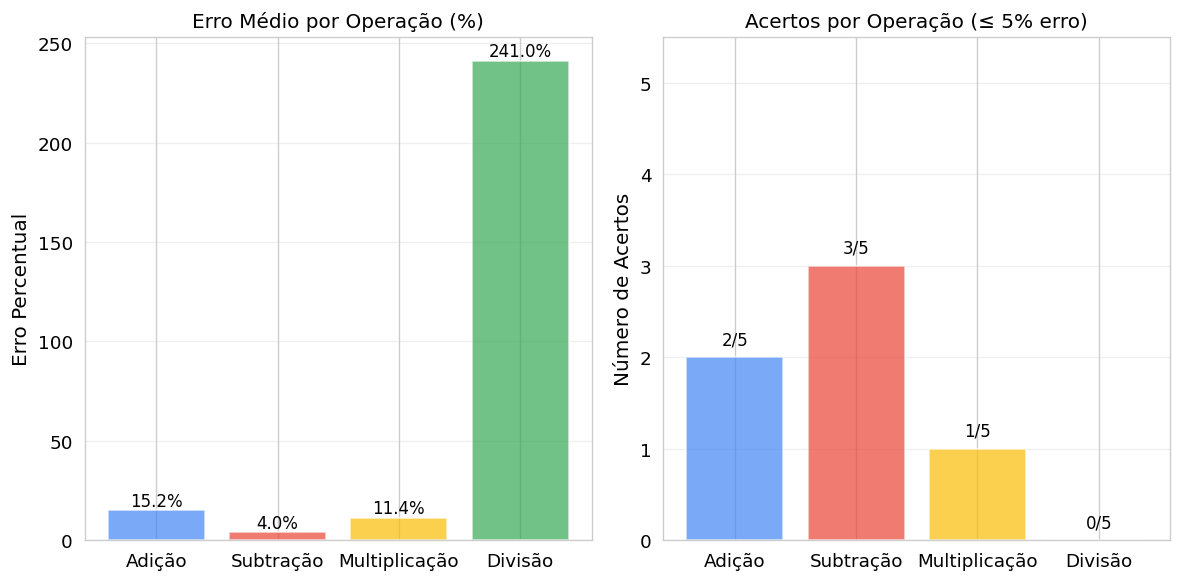


📊 Gerando gráficos de validação complementares...


In [ ]:
# Teste da Calculadora Neural com Relatório Visual - Versão Final com Insights
import numpy as np
import tensorflow as tf
import pickle
import os
import datetime
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# ======= CONFIGURAÇÃO INICIAL =======

# ✅ Caminhos dos arquivos
CAMINHO_MODELO = 'melhor_modelo.keras'
CAMINHO_NORMALIZADORES = 'normalizadores.pkl'

# ======= FUNÇÕES AUXILIARES =======

def salvar_normalizadores():
    """
    Salva os normalizadores utilizados no treinamento para uso na inferência.
    Esta função deve ser executada após o treinamento do modelo.
    """
    normalizadores = {
        'features': escala_entrada,
        'alvos': escala_saida,
        'operacoes': codificador_operacoes
    }
    
    with open(CAMINHO_NORMALIZADORES, 'wb') as arquivo:
        pickle.dump(normalizadores, arquivo)
    
    print(f"✅ Normalizadores salvos em: {CAMINHO_NORMALIZADORES}")

def verificar_arquivos():
    """
    Verifica se os arquivos necessários existem e cria os que faltam.
    """
    if not os.path.exists(CAMINHO_MODELO):
        print(f"❌ Modelo não encontrado em: {CAMINHO_MODELO}")
        print("ℹ️ Execute primeiro o script de treinamento para gerar o modelo.")
        return False
        
    if not os.path.exists(CAMINHO_NORMALIZADORES):
        print(f"⚠️ Arquivo de normalizadores não encontrado. Criando agora...")
        # Se os normalizadores não foram salvos, salva-os agora
        try:
            salvar_normalizadores()
        except NameError:
            print("❌ As variáveis de normalização não estão definidas.")
            print("ℹ️ Execute esta função após o treinamento do modelo.")
            return False
    
    return True

def carregar_modelo_e_normalizadores():
    """
    Carrega o modelo treinado e os normalizadores salvos.
    """
    if not verificar_arquivos():
        return None, None, None, None
    
    print("🔄 Carregando modelo e normalizadores...")
    modelo = tf.keras.models.load_model(CAMINHO_MODELO)
    
    with open(CAMINHO_NORMALIZADORES, 'rb') as arquivo:
        normalizadores = pickle.load(arquivo)
    
    return (
        modelo, 
        normalizadores['features'], 
        normalizadores['alvos'], 
        normalizadores['operacoes']
    )

# ✅ Funções de cálculo real e previsão
def calcular_esperado(n1, n2, operacao):
    """
    Calcula o resultado esperado da operação matemática.
    
    Parâmetros:
        n1: Primeiro operando
        n2: Segundo operando
        operacao: Código da operação (0: adição, 1: subtração, 2: multiplicação, 3: divisão)
    """
    if operacao == 0: return n1 + n2
    elif operacao == 1: return n1 - n2
    elif operacao == 2: return n1 * n2
    else: return n1 / (n2 if abs(n2) > 0.001 else 0.001)  # Evita divisão por zero

def prever_modelo(n1, n2, operacao, modelo, normalizador_entradas, normalizador_saidas, codificador_ops):
    """
    Realiza uma previsão utilizando o modelo treinado.
    
    Parâmetros:
        n1: Primeiro operando
        n2: Segundo operando
        operacao: Código da operação (0: adição, 1: subtração, 2: multiplicação, 3: divisão)
        modelo: Modelo treinado
        normalizador_entradas: Normalizador para os operandos
        normalizador_saidas: Normalizador para os resultados
        codificador_ops: Codificador para as operações
    """
    # Preparação dos dados de entrada
    entrada_original = np.array([[n1, n2]])
    operacao_onehot = codificador_ops.transform([[operacao]])
    entrada_normalizada = np.hstack([normalizador_entradas.transform(entrada_original), operacao_onehot])
    
    # Previsão e desnormalização
    predicao_normalizada = modelo.predict(entrada_normalizada, verbose=0)[0][0]
    return normalizador_saidas.inverse_transform([[predicao_normalizada]])[0][0]

def criar_grafico_comparativo(erros_por_operacao, acertos_por_operacao, nomes_operacoes):
    """
    Cria um gráfico comparativo entre as operações e retorna o HTML correspondente.
    """
    # Configurações de estilo para fontes pretas e legíveis
    plt.rcParams.update({
        'text.color': 'black',
        'axes.labelcolor': 'black',
        'xtick.color': 'black',
        'ytick.color': 'black',
        'axes.titlecolor': 'black',
        'font.size': 11,
        'axes.labelsize': 12,
        'axes.titlesize': 14
    })
    
    # Criar figura para o gráfico de barras
    plt.figure(figsize=(10, 5))
    
    # Configurar cores para o gráfico de barras
    cores_barras = ['#4285F4', '#EA4335', '#FBBC05', '#34A853']  # Cores do Google
    
    # Plotar gráfico de barras para erro médio
    ax1 = plt.subplot(121)
    bars = plt.bar(nomes_operacoes, erros_por_operacao, color=cores_barras, alpha=0.7)
    plt.title('Erro Médio por Operação (%)', fontsize=12, color='black')
    plt.ylabel('Erro Percentual', color='black')
    plt.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{erros_por_operacao[i]:.1f}%',
                ha='center', va='bottom', fontsize=10, color='black')
    
    # Plotar gráfico de barras para acertos
    ax2 = plt.subplot(122)
    bars = plt.bar(nomes_operacoes, acertos_por_operacao, color=cores_barras, alpha=0.7)
    plt.title('Acertos por Operação (≤ 5% erro)', fontsize=12, color='black')
    plt.ylabel('Número de Acertos', color='black')
    plt.ylim(0, 5.5)  # Limite do eixo y
    plt.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{acertos_por_operacao[i]}/5',
                ha='center', va='bottom', fontsize=10, color='black')
    
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig('comparacao_operacoes.png', bbox_inches='tight', dpi=120)
    
    # Converter para base64 para incluir no HTML
    import base64
    from io import BytesIO
    
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight', dpi=120)
    buffer.seek(0)
    img_str = base64.b64encode(buffer.read()).decode('utf-8')
    plt.close()
    
    # Retornar como tag HTML
    return f'<img src="data:image/png;base64,{img_str}" style="max-width:100%; margin:20px 0;">'

def gerar_relatorio_visual(modelo, normalizador_entradas, normalizador_saidas, codificador_ops):
    """
    Gera um relatório visual HTML detalhado sobre o desempenho do modelo.
    """
    # ✅ Layout e configurações
    operadores = ['+', '-', '*', '/']
    nomes_operacoes = ['Adição', 'Subtração', 'Multiplicação', 'Divisão']
    cores_secoes = ["#e7f3ff", "#fff5e6", "#e8f5e9", "#ffebee"]
    cores_cabecalho_secoes = ["#1976D2", "#FFA000", "#388E3C", "#D32F2F"]
    
    # Obter data atual formatada
    data_atual = datetime.datetime.now().strftime('%d/%m/%Y')
    
    # CSS adicional para melhorar o layout e garantir fontes pretas
    css_estilo = """
    <style>
        .dashboard-container {
            font-family: 'Segoe UI', Roboto, 'Helvetica Neue', Arial, sans-serif;
            max-width: 1100px;
            margin: auto;
            box-shadow: 0 4px 20px rgba(0,0,0,0.15);
            border-radius: 12px;
            overflow: hidden;
            background: #f9f9f9;
            color: black;
        }
        .dashboard-header {
            background: linear-gradient(135deg, #3f51b5, #5c6bc0);
            color: white;
            padding: 30px 35px;
            position: relative;
            overflow: hidden;
        }
        .dashboard-header::after {
            content: "";
            position: absolute;
            top: 0;
            right: 0;
            bottom: 0;
            left: 0;
            background: url('data:image/svg+xml;utf8,<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 100 100" preserveAspectRatio="none"><path d="M0,0 L100,100 L100,0 Z" fill="rgba(255,255,255,0.1)" /></svg>');
            background-size: 100% 100%;
        }
        .dashboard-header h2 {
            margin: 0;
            font-size: 28px;
            font-weight: 600;
            color: white;
        }
        .dashboard-header p {
            margin: 8px 0 0;
            opacity: 0.9;
            color: white;
        }
        .dashboard-body {
            padding: 30px;
            color: black;
        }
        .dashboard-section {
            background: white;
            border-radius: 8px;
            margin-bottom: 25px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.05);
            overflow: hidden;
            color: black;
        }
        .dashboard-section-header {
            padding: 15px 20px;
            font-size: 18px;
            font-weight: 600;
            color: white;
        }
        .dashboard-section-content {
            padding: 20px;
            color: black;
        }
        .stats-grid {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(230px, 1fr));
            gap: 15px;
            margin-bottom: 20px;
        }
        .stat-card {
            background: #f9f9f9;
            border-radius: 8px;
            padding: 15px;
            display: flex;
            flex-direction: column;
            border-left: 5px solid #3f51b5;
            color: black;
        }
        .stat-title {
            font-size: 14px;
            color: #333;
        }
        .stat-value {
            font-size: 22px;
            font-weight: 600;
            margin: 5px 0;
            color: black;
        }
        .data-table {
            width: 100%;
            border-collapse: collapse;
            font-size: 14px;
            margin-bottom: 15px;
            color: black;
        }
        .data-table th {
            background: #f1f1f1;
            padding: 12px 15px;
            text-align: center;
            font-weight: 600;
            color: black;
        }
        .data-table td {
            padding: 12px 15px;
            text-align: center;
            border-bottom: 1px solid #eee;
            color: black;
        }
        .data-table tr:last-child td {
            border-bottom: none;
        }
        .data-table tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        .performance-summary {
            background: #f5f7fb;
            padding: 15px 20px;
            border-radius: 8px;
            margin-top: 20px;
            font-size: 14px;
            line-height: 1.6;
            color: black;
        }
        .status-success {
            color: #388E3C;
            font-weight: 600;
        }
        .status-warning {
            color: #FFA000;
            font-weight: 600;
        }
        .status-danger {
            color: #D32F2F;
            font-weight: 600;
        }
        .insight-item {
            display: flex;
            align-items: flex-start;
            margin-bottom: 12px;
            line-height: 1.5;
            color: black;
        }
        .insight-icon {
            font-size: 18px;
            margin-right: 12px;
            min-width: 24px;
            text-align: center;
        }
        .dashboard-footer {
            text-align: center;
            background: #f1f1f1;
            padding: 15px;
            color: #333;
            font-size: 13px;
            border-top: 1px solid #ddd;
        }
        .chart-container {
            width: 100%;
            overflow: hidden;
            margin: 20px 0;
        }
        h3, h4, h5 {
            color: black;
        }
        p, span, div {
            color: black;
        }
        strong {
            color: black;
        }
        ul, li {
            color: black;
        }
        .performance-summary strong {
            color: black;
        }
    </style>
    """
    
    # Cabeçalho do relatório
    html = f"""
    {css_estilo}
    <div class="dashboard-container">
        <div class="dashboard-header">
            <h2>📊 Relatório de Avaliação do Modelo — Calculadora Neural</h2>
            <p>Aluno: <strong> Welligton costa dos santos - 2019101307</strong> | Disciplina: <strong>Redes Neurais 2 </strong></p>
            <p>Aluno: <strong>Janderson Sebastião do Carmo Rocha - 2020101157</strong></p>
            <p>Aluno: <strong>Bruno Thiago Ferreira Lins - 2017102980</strong></p>
            <p style="font-size: 13px; margin-top: 4px;">Data: {data_atual}</p>
        </div>
        <div class="dashboard-body">
            <!-- Seção: Resumo do Modelo -->
            <div class="dashboard-section">
                <div class="dashboard-section-header" style="background: #3f51b5;">
                    Resumo do Modelo
                </div>
                <div class="dashboard-section-content">
                    <div class="stats-grid">
                        <div class="stat-card">
                            <div class="stat-title">🔢 Camadas</div>
                            <div class="stat-value">{len(modelo.layers)}</div>
                        </div>
                        <div class="stat-card">
                            <div class="stat-title">🧠 Parâmetros treináveis</div>
                            <div class="stat-value">{modelo.count_params():,}</div>
                        </div>
                        <div class="stat-card">
                            <div class="stat-title">⚙️ Otimizador</div>
                            <div class="stat-value">{modelo.optimizer.__class__.__name__}</div>
                        </div>
                        <div class="stat-card">
                            <div class="stat-title">📉 Função de perda</div>
                            <div class="stat-value">{modelo.loss}</div>
                        </div>
                    </div>
    """
    
    # ✅ Insights automáticos do modelo
    ativacoes_utilizadas = []
    for layer in modelo.layers:
        if isinstance(layer, tf.keras.layers.LeakyReLU):
            ativacoes_utilizadas.append("leaky_relu")
        elif hasattr(layer, 'activation') and callable(layer.activation):
            try:
                # Tenta obter o nome da função de ativação
                ativacoes_utilizadas.append(layer.activation.__name__)
            except AttributeError:
                # Caso a ativação seja um objeto e não uma função
                ativacoes_utilizadas.append(str(layer.activation).split('.')[-1].split(' ')[0])
    
    ativacoes_utilizadas = [a for a in list(set(ativacoes_utilizadas)) if a != 'linear']
    
    funcoes_disponiveis = {'relu', 'tanh', 'selu', 'leaky_relu'}
    nao_usadas = funcoes_disponiveis - set(ativacoes_utilizadas)
    
    html += """
                    <h3 style="margin-top: 25px; font-size: 18px; color: #000; border-bottom: 2px solid #eee; padding-bottom: 10px;">
                        Insights Técnicos
                    </h3>
                    <div style="margin-top: 15px;">
    """
    
    # Adiciona insights como itens com ícones
    html += f"""
                        <div class="insight-item">
                            <div class="insight-icon">🧠</div>
                            <div>
                                <strong>Funções de Ativação:</strong> {', '.join(ativacoes_utilizadas) if ativacoes_utilizadas else "Nenhuma identificada"}
                            </div>
                        </div>
                        
                        <div class="insight-item">
                            <div class="insight-icon">📐</div>
                            <div>
                                <strong>Total de Camadas Densas:</strong> {sum(isinstance(l, tf.keras.layers.Dense) for l in modelo.layers)}
                            </div>
                        </div>
                        
                        <div class="insight-item">
                            <div class="insight-icon">📊</div>
                            <div>
                                <strong>Métrica de Avaliação:</strong> MAE (Erro Absoluto Médio)
                            </div>
                        </div>
                        
                        <div class="insight-item">
                            <div class="insight-icon">🧪</div>
                            <div>
                                <strong>Arquitetura:</strong> MLP com entrada de 2 valores + codificação one-hot da operação
                            </div>
                        </div>
    """
    
    # Adiciona funções não utilizadas se houver
    if nao_usadas:
        html += f"""
                        <div class="insight-item">
                            <div class="insight-icon" style="color: #D32F2F;">⚠️</div>
                            <div>
                                <strong>Funções não utilizadas:</strong> {', '.join(nao_usadas)}
                            </div>
                        </div>
        """
    
    html += """
                    </div>
                </div>
            </div>
    """
    
    # Estatísticas gerais para comparação entre operações
    erros_por_operacao = []
    acertos_por_operacao = []
    erros_absolutos_por_operacao = []
    
    # ✅ Geração de testes por operação
    for op_index, nome_op in enumerate(nomes_operacoes):
        html += f"""
            <!-- Seção: {nome_op} -->
            <div class="dashboard-section">
                <div class="dashboard-section-header" style="background: {cores_cabecalho_secoes[op_index]};">
                    {nome_op} ({operadores[op_index]})
                </div>
                <div class="dashboard-section-content" style="background: {cores_secoes[op_index]};">
                    <table class="data-table">
                        <thead>
                            <tr>
                                <th>📐 Expressão</th>
                                <th>✔️ Esperado</th>
                                <th>🤖 Previsto</th>
                                <th>📊 Erro (%)</th>
                            </tr>
                        </thead>
                        <tbody>
        """
    
        erro_total = 0
        acertos_ate_5 = 0
        erros_absolutos = []
        
        # Executa 5 testes para cada operação
        for i in range(5):
            # Gera operandos aleatórios
            n1 = np.random.uniform(-10, 10)
            n2 = np.random.uniform(-10, 10)
            # Evita divisão por valores muito próximos de zero
            if op_index == 3 and abs(n2) < 0.1:
                n2 = 0.1 * (1 if n2 >= 0 else -1)
    
            # Calcula resultado esperado e previsto
            esperado = calcular_esperado(n1, n2, op_index)
            previsto = prever_modelo(n1, n2, op_index, modelo, normalizador_entradas, normalizador_saidas, codificador_ops)
            
            # Calcula erro percentual, evitando divisão por zero
            if abs(esperado) < 0.001:
                erro_perc = abs(previsto - esperado) * 100  # Erro absoluto * 100 para casos próximos a zero
            else:
                erro_perc = abs((previsto - esperado) / esperado) * 100
            
            erro_abs = abs(previsto - esperado)
            erros_absolutos.append(erro_abs)
            
            # Acumula estatísticas
            erro_total += erro_perc
            if erro_perc <= 5: 
                acertos_ate_5 += 1
            
            # Define status baseado no erro
            status_class = 'status-success' if erro_perc <= 1 else 'status-warning' if erro_perc <= 5 else 'status-danger'
    
            # Adiciona linha na tabela
            html += f"""
                            <tr>
                                <td>{n1:.2f} {operadores[op_index]} {n2:.2f}</td>
                                <td>{esperado:.4f}</td>
                                <td>{previsto:.4f}</td>
                                <td class="{status_class}">{erro_perc:.2f}%</td>
                            </tr>
            """
    
        # Calcula e armazena estatísticas da operação
        erro_medio = erro_total / 5
        erro_abs_medio = np.mean(erros_absolutos)
        erros_por_operacao.append(erro_medio)
        acertos_por_operacao.append(acertos_ate_5)
        erros_absolutos_por_operacao.append(erro_abs_medio)
        
        # Adiciona resumo da operação
        status_class_operacao = 'status-success' if erro_medio <= 2 else 'status-warning' if erro_medio <= 5 else 'status-danger'
        
        html += f"""
                        </tbody>
                    </table>
                    
                    <div class="performance-summary">
                        <div style="display: flex; justify-content: space-between; flex-wrap: wrap;">
                            <div style="min-width: 200px; margin-bottom: 10px;">
                                <span style="font-weight: 600; font-size: 16px;" class="{status_class_operacao}">
                                    {erro_medio:.2f}%
                                </span>
                                <span style="margin-left: 5px; color: black;">Erro Médio</span>
                            </div>
                            <div style="min-width: 200px; margin-bottom: 10px;">
                                <span style="font-weight: 600; font-size: 16px; color: black;">
                                    {acertos_ate_5}/5
                                </span>
                                <span style="margin-left: 5px; color: black;">Previsões com erro ≤ 5%</span>
                            </div>
                            <div style="min-width: 200px; margin-bottom: 10px;">
                                <span style="font-weight: 600; font-size: 16px; color: black;">
                                    {erro_abs_medio:.6f}
                                </span>
                                <span style="margin-left: 5px; color: black;">Erro Absoluto Médio</span>
                            </div>
                        </div>
                    </div>
                </div>
            </div>
        """
    
    # Cria gráfico comparativo entre operações
    grafico_comparativo = criar_grafico_comparativo(erros_por_operacao, acertos_por_operacao, nomes_operacoes)
    
    # Adiciona comparação entre operações
    melhor_op_index = np.argmin(erros_por_operacao)
    pior_op_index = np.argmax(erros_por_operacao)
    
    html += f"""
            <!-- Seção: Análise Comparativa -->
            <div class="dashboard-section">
                <div class="dashboard-section-header" style="background: #673AB7;">
                    Análise Comparativa
                </div>
                <div class="dashboard-section-content">
                    <div class="chart-container">
                        {grafico_comparativo}
                    </div>
                    
                    <div class="performance-summary" style="background: #f0f4f8; border-left: 5px solid #673AB7;">
                        <div class="insight-item">
                            <div class="insight-icon" style="color: #388E3C;">🏆</div>
                            <div>
                                <strong style="color: black;">Melhor desempenho:</strong> <span style="color: black;">{nomes_operacoes[melhor_op_index]} (Erro médio: {erros_por_operacao[melhor_op_index]:.2f}%)</span>
                            </div>
                        </div>
                        <div class="insight-item">
                            <div class="insight-icon" style="color: #D32F2F;">⚠️</div>
                            <div>
                                <strong style="color: black;">Desafio maior:</strong> <span style="color: black;">{nomes_operacoes[pior_op_index]} (Erro médio: {erros_por_operacao[pior_op_index]:.2f}%)</span>
                            </div>
                        </div>
                        <div class="insight-item">
                            <div class="insight-icon">💡</div>
                            <div>
                                <strong style="color: black;">Insights:</strong> <span style="color: black;">{get_insights(erros_por_operacao, acertos_por_operacao, nomes_operacoes)}</span>
                            </div>
                        </div>
                    </div>
                </div>
            </div>
    """
    
    # ✅ Rodapé
    html += """
        </div>
        <div class="dashboard-footer">
            Desenvolvido com <strong>TensorFlow</strong> + <strong>Keras</strong> + <strong>Keras Tuner</strong>.<br>
            Professor: Sérgio Assunção Monteiro, D.Sc.
        </div>
    </div>
    """
    
    return html

def get_insights(erros, acertos, nomes_operacoes):
    """Gera insights baseados nos resultados dos testes."""
    insights = []
    
    # Verifica se há alguma operação com erro médio acima de 5%
    ops_problema = [nomes_operacoes[i] for i, erro in enumerate(erros) if erro > 5]
    if ops_problema:
        insights.append(f"As operações {', '.join(ops_problema)} apresentam erro médio superior a 5% e podem precisar de mais treinamento.")
    
    # Verifica se alguma operação tem erro muito baixo (menos de 1%)
    ops_excelentes = [nomes_operacoes[i] for i, erro in enumerate(erros) if erro < 1]
    if ops_excelentes:
        insights.append(f"Excelente resultado para {', '.join(ops_excelentes)} com erro médio abaixo de 1%.")
    
    # Verifica o padrão geral
    media_erros = np.mean(erros)
    if media_erros < 3:
        insights.append("O modelo apresenta ótimo desempenho geral, com erro médio abaixo de 3%.")
    elif media_erros < 5:
        insights.append("O modelo apresenta bom desempenho geral, com erro médio abaixo de 5%.")
    else:
        insights.append("O modelo precisa de mais refinamento para melhorar a precisão geral.")
    
    # Se não houver insights específicos
    if not insights:
        insights.append("O modelo está funcionando conforme esperado para as quatro operações básicas.")
    
    return " ".join(insights)

def executar_validacao():
    """
    Executa o processo completo de validação do modelo.
    """
    print("🔍 Iniciando validação do modelo de calculadora neural...")
    
    # Carrega o modelo e normalizadores
    modelo, normalizador_entradas, normalizador_saidas, codificador_ops = carregar_modelo_e_normalizadores()
    
    if modelo is None:
        return
    
    # Gera e exibe o relatório
    html_relatorio = gerar_relatorio_visual(modelo, normalizador_entradas, normalizador_saidas, codificador_ops)
    display(HTML(html_relatorio))
    
    # Gera gráficos adicionais para análise
    print("\n📊 Gerando gráficos de validação complementares...")
    
    # Testa o modelo com uma grade de valores para visualização
    operadores = ['+', '-', '*', '/']
    nomes_operacoes = ['Adição', 'Subtração', 'Multiplicação', 'Divisão']
    
    # Configurações para garantir texto preto e legível em todos os gráficos
    plt.rcParams.update({
        'text.color': 'black',
        'axes.labelcolor': 'black',
        'xtick.color': 'black',
        'ytick.color': 'black',
        'axes.titlecolor': 'black',
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'figure.titlesize': 18
    })
    
    # Define uma grade de valores para visualização
    x = np.linspace(-5, 5, 20)
    y = np.linspace(-5, 5, 20)
    X, Y = np.meshgrid(x, y)
    
    # Configura estilo do Seaborn para gráficos mais atraentes
    sns.set_style("whitegrid")
    plt.figure(figsize=(20, 15))
    
    # Cria um mapa de cores personalizado e mais moderno
    colors = ["#4285F4", "#34A853", "#FBBC05", "#EA4335"]  # Cores do Google
    cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", ["#E0F7FA", "#B2EBF2", "#80DEEA", "#4DD0E1", "#26C6DA", "#00BCD4", "#00ACC1", "#0097A7", "#00838F", "#006064"], N=256)
    
    for op_index in range(4):
        # Evita divisão por zero na visualização
        if op_index == 3:
            Y_safe = np.where(np.abs(Y) < 0.1, 0.1 * np.sign(Y), Y)
            Y_plot = Y_safe
        else:
            Y_plot = Y
        
        # Calcula resultados esperados e previstos
        Z_esperado = np.zeros_like(X)
        Z_previsto = np.zeros_like(X)
        Z_erro = np.zeros_like(X)
        
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z_esperado[i, j] = calcular_esperado(X[i, j], Y_plot[i, j], op_index)
                Z_previsto[i, j] = prever_modelo(
                    X[i, j], Y_plot[i, j], op_index, 
                    modelo, normalizador_entradas, normalizador_saidas, codificador_ops
                )
                Z_erro[i, j] = abs(Z_previsto[i, j] - Z_esperado[i, j])
        
        # Limita os valores extremos para melhor visualização
        if op_index == 2 or op_index == 3:  # Multiplicação e divisão podem gerar valores muito grandes
            Z_erro = np.clip(Z_erro, 0, np.percentile(Z_erro, 95))  # Clipa a 95% para eliminar outliers extremos
        
        # Cria subplots para cada operação com estilo moderno
        plt.subplot(2, 2, op_index + 1)
        plt.title(f"{nomes_operacoes[op_index]} ({operadores[op_index]})", fontsize=16, fontweight='bold', color='black', pad=15)
        
        # Plota mapa de calor do erro com gradiente de cores mais suave
        im = plt.imshow(
            Z_erro, 
            extent=[-5, 5, -5, 5], 
            origin='lower', 
            cmap=cmap_custom,
            vmin=0, 
            vmax=min(2, Z_erro.max()),
            aspect='auto',
            interpolation='bilinear'  # Suavização da imagem
        )
        
        # Adiciona contornos para destacar áreas de erro similar
        contornos = plt.contour(X, Y_plot, Z_erro, 
                               levels=5, 
                               colors='black', 
                               alpha=0.6, 
                               linewidths=0.5)
        plt.clabel(contornos, inline=True, fontsize=10, fmt='%.2f', colors='black')
        
        # Melhora a aparência da barra de cores
        cb = plt.colorbar(im, label='Erro Absoluto', pad=0.02)
        cb.ax.tick_params(labelsize=10, labelcolor='black')
        cb.set_label('Erro Absoluto', size=12, weight='bold', color='black')
        
        # Adiciona rótulos e grade
        plt.xlabel('Operando 1', fontsize=12, fontweight='bold', color='black')
        plt.ylabel('Operando 2', fontsize=12, fontweight='bold', color='black')
        plt.grid(alpha=0.3, linestyle='--', color='gray')
        
        # Certifica-se de que os ticks são pretos
        plt.tick_params(axis='both', colors='black')
        
        # Adiciona anotação com estatísticas-chave
        erro_medio = Z_erro.mean()
        erro_maximo = Z_erro.max()
        plt.annotate(
            f"Erro médio: {erro_medio:.4f}\nErro máximo: {erro_maximo:.4f}",
            xy=(0.05, 0.05), 
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
            fontsize=10,
            color='black'
        )
    
    plt.tight_layout(pad=3.0)
    plt.savefig('validacao_modelo_heatmap.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Cria um gráfico adicional de distribuição de erros por operação
    print("\n📊 Analisando distribuição de erros por operação...")
    
    # Coleta amostras de erro para cada operação
    amostras_por_op = 200
    erros_distribuicao = {op: [] for op in range(4)}
    
    for op in range(4):
        for _ in range(amostras_por_op):
            # Gera operandos aleatórios
            n1 = np.random.uniform(-10, 10)
            n2 = np.random.uniform(-10, 10)
            
            # Evita divisão por valores próximos de zero
            if op == 3 and abs(n2) < 0.1:
                n2 = 0.1 * (1 if n2 >= 0 else -1)
            
            # Calcula erro
            esperado = calcular_esperado(n1, n2, op)
            previsto = prever_modelo(n1, n2, op, modelo, normalizador_entradas, normalizador_saidas, codificador_ops)
            erro = abs(previsto - esperado)
            
            erros_distribuicao[op].append(erro)
    
    # Configura gráfico de violino para mostrar distribuição
    plt.figure(figsize=(12, 8))
    
    # Prepara dados para o gráfico de violino
    data = [erros_distribuicao[op] for op in range(4)]
    
    # Cores mais modernas e atraentes para cada operação
    violin_colors = ["#4285F4", "#EA4335", "#FBBC05", "#34A853"]
    
    # Cria gráfico de violino
    parts = plt.violinplot(data, showmeans=True, showmedians=True)
    
    # Personaliza cores e estilo
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(violin_colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    
    # Personaliza linhas de média e mediana
    parts['cmeans'].set_color('black')
    parts['cmeans'].set_linewidth(1.5)
    parts['cmedians'].set_color('darkred')
    parts['cmedians'].set_linewidth(1.5)
    
    # Adiciona rótulos e títulos
    plt.xticks([1, 2, 3, 4], [f"{op} ({operadores[i]})" for i, op in enumerate(nomes_operacoes)], color='black')
    plt.ylabel('Erro Absoluto', fontsize=14, fontweight='bold', color='black')
    plt.title('Distribuição de Erros por Operação', fontsize=16, fontweight='bold', color='black', pad=20)
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
    
    # Certifica-se de que os ticks são pretos
    plt.tick_params(axis='both', colors='black')
    
    # Adiciona estatísticas numéricas para cada operação
    for i, op in enumerate(range(4)):
        erros = erros_distribuicao[op]
        media = np.mean(erros)
        mediana = np.median(erros)
        max_erro = np.max(erros)
        
        plt.annotate(
            f"Média: {media:.4f}\nMediana: {mediana:.4f}\nMáximo: {max_erro:.4f}",
            xy=(i+1, max_erro),
            xytext=(i+1, max_erro + 0.1),
            ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=violin_colors[i], alpha=0.8),
            fontsize=9,
            color='black'
        )
    
    plt.tight_layout()
    plt.savefig('distribuicao_erros_por_operacao.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Cria um gráfico de barras horizontais para visualização do desempenho relativo
    print("\n📊 Criando gráfico de desempenho relativo...")
    
    # Obtém os dados de erro médio para cada operação
    erros_medios = []
    for op in range(4):
        erros_array = np.array(erros_distribuicao[op])
        erros_medios.append(np.mean(erros_array))
    
    # Cria o gráfico de barras horizontais
    plt.figure(figsize=(10, 6))
    
    # Inverte a ordem para que a melhor operação fique no topo
    indices_ordenados = np.argsort(erros_medios)
    operacoes_ordenadas = [nomes_operacoes[i] for i in indices_ordenados]
    erros_ordenados = [erros_medios[i] for i in indices_ordenados]
    cores_ordenadas = [violin_colors[i] for i in indices_ordenados]
    
    # Cria barras horizontais
    barras = plt.barh(operacoes_ordenadas, erros_ordenados, color=cores_ordenadas, alpha=0.7)
    
    # Adiciona rótulos e títulos
    plt.xlabel('Erro Absoluto Médio', fontsize=14, fontweight='bold', color='black')
    plt.title('Ranking de Desempenho por Operação', fontsize=16, fontweight='bold', color='black', pad=20)
    plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')
    
    # Adiciona valores nas barras
    for i, barra in enumerate(barras):
        width = barra.get_width()
        plt.text(width + 0.01, barra.get_y() + barra.get_height()/2,
                f'{erros_ordenados[i]:.6f}',
                va='center', fontsize=10, color='black')
    
    # Adiciona descrição de melhor/pior desempenho
    plt.annotate(
        '✅ Melhor desempenho',
        xy=(0.01, operacoes_ordenadas[0]),
        xytext=(-80, 0),
        textcoords='offset points',
        va='center',
        color='darkgreen',
        fontsize=10,
        fontweight='bold'
    )
    
    plt.annotate(
        '⚠️ Maior desafio',
        xy=(0.01, operacoes_ordenadas[-1]),
        xytext=(-80, 0),
        textcoords='offset points',
        va='center',
        color='darkred',
        fontsize=10,
        fontweight='bold'
    )
    
    plt.tight_layout()
    plt.savefig('ranking_desempenho.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✅ Validação concluída! Relatório e visualizações gerados com sucesso.")

# ======= SALVANDO OS NORMALIZADORES =======

def salvar_normalizadores_para_validacao():
    """
    Salva os normalizadores do modelo treinado em um arquivo pickle.
    Esta função deve ser executada uma vez após o treinamento.
    """
    if 'escala_entrada' not in globals() or 'escala_saida' not in globals() or 'codificador_operacoes' not in globals():
        print("❌ As variáveis de normalização não estão definidas no escopo global.")
        print("ℹ️ Execute esta função após o treinamento do modelo.")
        return False
    
    # Cria um dicionário com os normalizadores
    normalizadores = {
        'features': escala_entrada,
        'alvos': escala_saida,
        'operacoes': codificador_operacoes
    }
    
    # Salva em arquivo
    with open(CAMINHO_NORMALIZADORES, 'wb') as arquivo:
        pickle.dump(normalizadores, arquivo)
    
    print(f"✅ Normalizadores salvos com sucesso em: {CAMINHO_NORMALIZADORES}")
    return True

# ======= EXECUÇÃO PRINCIPAL =======

if __name__ == "__main__":
    # Verifica se este arquivo está sendo executado após o treinamento
    if 'melhor_modelo' in globals() and 'escala_entrada' in globals() and 'escala_saida' in globals() and 'codificador_operacoes' in globals():
        print("🔍 Detectado que o script está sendo executado após o treinamento.")
        print("💾 Salvando modelo e normalizadores...")
        
        # Salva o modelo
        try:
            melhor_modelo.save(CAMINHO_MODELO)
            print(f"✅ Modelo salvo com sucesso em: {CAMINHO_MODELO}")
        except Exception as e:
            print(f"❌ Erro ao salvar o modelo: {e}")
        
        # Salva os normalizadores
        salvar_normalizadores_para_validacao()
        
        # Executa a validação
        executar_validacao()
    else:
        # Apenas executa a validação caso o modelo já tenha sido salvo
        print("🔍 Executando validação independente do modelo treinado...")
        executar_validacao()